<a href="https://colab.research.google.com/github/athirah-o/STQD6014_Data_Science_Notes/blob/main/Airlines_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#from google.colab import drive
#drive.mount('/content/drive')

# **Analysis on Airline Ticket Prices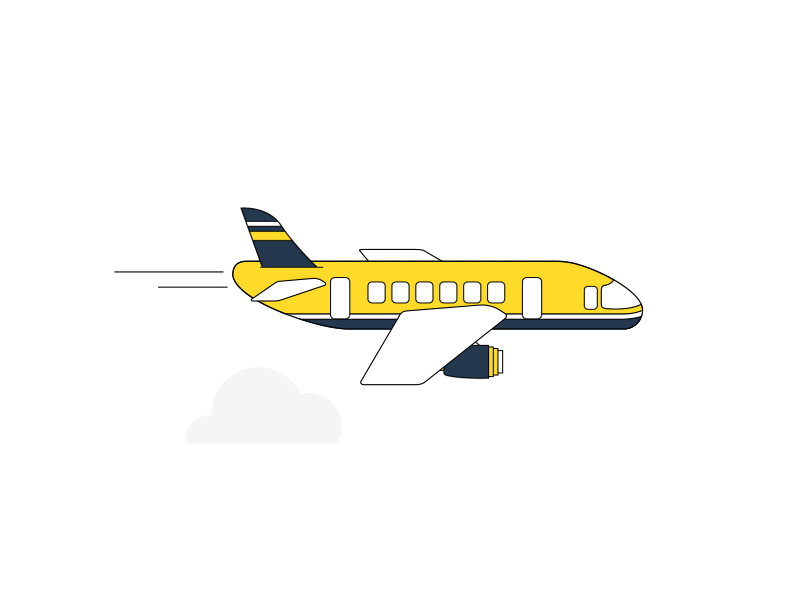**

## **Content**

> A.  Introduction

> B.  What we would like to find from this analysis?

> C. Info on dataset

> D.  Data loading

> E.  Data cleaning

> F.  Summary of Data

> G.  Results and discussion: Analyzing data through visualization
1.  The most popular by categories:
    *   a) Airlines
    *   b) Source and destination city
    *   c) Departure and arrival time
2.  Price vs Categories:
    *   a) Airlines
    *   b) Class
    *   c) Source and destination city
    *   d) Departure and arrival time
    *   e) Days before departure
    
> H. Conclusion

# **A. Introduction**

The airline industry encompasses various businesses, called airlines, which offer air transport services for paying customers or business partners. These air transport services are provided for both human travelers and cargo, and are most commonly offered via jets, although some airlines also use helicopters.

Pricing of airline tickets is a complex process driven by algorithms, AI technology, historical data, and other strategies. The price will always on the move as it goes up and down frequently. This is because they used a process known as yield management to determing the ticket price with the aim to fill the airplane profitably. There are several factors that determining the ticket prices such as profiling of travelers,length of advance purchase, current sales volume, competition, peak dates, level of overbooking, and fuel prices.

In understanding how several factors affect the ticket price, we can have an advantage on how to get the best airfare deal for our travel.

# **B. What we would like to find from this analysis?**

1. Which airlines has the most booking?
2. Which city is the most popular as source and destination city among 6 metropolitan cities in India?
3. Is there any different in terms of number of booking based on departure and arrival timing?
4. Does price vary with Airlines
5. How much different between price of economy and business class?
6. Does price differ between source and arrival cities?
7. Do the timing of departure and arrival has effect on ticket price?
8. How days before departure affect the price?

# **C. Info of dataset**

This dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. Data was collected for 50 days, from February 11th to March 31st, 2022. There are 300261 datapoints and 11 features in the cleaned dataset.

### FEATURES

  1. Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

  2. Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

  3. Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

  4. Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

  5. Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

  6. Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

  7. Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

  8. Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

  9. Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

  10. Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

  11. Price: Target variable stores information of the ticket price.


# **D. Data Loading**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
url = "https://tinyurl.com/3zvzuvfw"

df = pd.read_csv(url)
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# **E. DATA CLEANING**

In [24]:
# check for info on column names, null values and data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [25]:
# check for null values

df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [26]:
#check for duplicated values

df.duplicated().sum()

0

In [27]:
# drop column "Unnamed" from DataFrame

df = df.drop("Unnamed: 0", axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# **F. SUMMARY OF DATA**

In [28]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [29]:
df.shape

(300153, 11)

In [30]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


# **G.  Results and discussion: Analyzing data through visualization**

## **1. Most popular by categories:**

*   Airlines
*   Source city
*   Destination city
*   Departure time
*   Arrival time









In [31]:
# Airlines with the most flights flown

df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

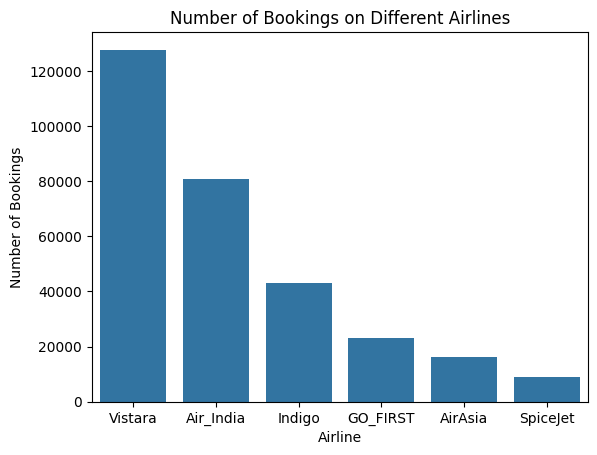

In [32]:
g1 = sns.countplot(df, x="airline", order = df["airline"].value_counts().index)
plt.title("Number of Bookings on Different Airlines")
plt.xlabel("Airline")
plt.ylabel("Number of Bookings")
plt.show();

#fig1 = g1.get_figure()
#fig1.savefig("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_1/Graphs/Graph_1")

Insights:

*   Vistara and Air_India are full-serviced carrier while Indigo, GO_First, AirAsia and SpiceJet are low-cost carrier(LCC).
*   In 2022, Vistara able beat to Indigo(India's largest airline and LLC) in terms of dosmetic market share mainly because of its aggresive pricing which allowed it to directly compete with LCC in India. India being a price sensitive market over the years makes Vistara, a full-service carrier dominates the domestic market share is a great achievement.
*   The graph above shows Vistara dominates the number booking made in the website compare to other LCC.
*   Furthermore, Vistara achieved the second-highest on-time performance among airlines operating in the four metro cities of Mumbai, Chennai, Delhi, and Kolkata. This influence Vistara to be the most preferred airlines to travel dosmetically.








source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

-------------------

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64


Text(0.5, 1.0, 'Most popular destination_city')

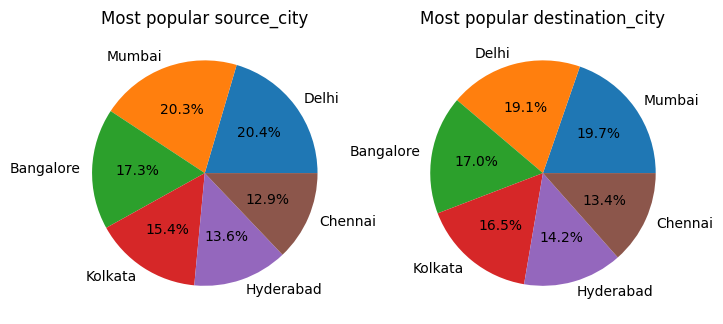

In [33]:
# Most popular origin and destination city

sc = df.source_city.value_counts()
dc = df.destination_city.value_counts()

print(sc)
print("\n-------------------\n")
print(dc)

labels_sc = df.source_city.value_counts().index.tolist()
labels_dc = df.destination_city.value_counts().index.tolist()

fig, ax = plt.subplots(1, 2, figsize = (8,4))
ax[0].pie(sc, labels=labels_sc, autopct = "%1.1f%%")
ax[0].set_title('Most popular source_city')

ax[1].pie(dc, labels=labels_dc, autopct = "%1.1f%%")
ax[1].set_title('Most popular destination_city')

#plt.savefig("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_1/Graphs/Graph_2")


Insights:


*   Above graph shows, Delhi and Mumbai have the highest percentage of people travel among the india metropolitan city as both source and destination city.
*   Delhi is the capital city of India and Mumbai being the financial capital of India makes these two cities the destinations of choice for travelers.
*   Mumbai is the most populated city in India, with a metropolitan population of 18,414,288 and a city proper population of 12,442,3731. Delhi, Bangalore, Kolkata, and Chennai are also among the most populated cities in India





departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

-------------------

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64


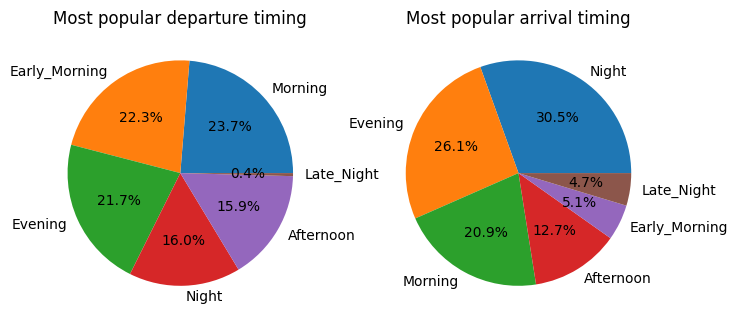

In [34]:
# Most popular departure and arrival timing

dt = df.departure_time.value_counts()
at = df.arrival_time.value_counts()

print(dt)
print("\n-------------------\n")
print(at)

labels_dt = dt.index.tolist()
labels_at = at.index.tolist()

fig, ax = plt.subplots(1, 2, figsize = (8,4))
ax[0].pie(dt, labels=labels_dt, autopct = "%1.1f%%")
ax[0].set_title('Most popular departure timing')

ax[1].pie(at, labels=labels_at, autopct = "%1.1f%%")
ax[1].set_title('Most popular arrival timing');

#plt.savefig("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_1/Graphs/Graph_3")

Insights:

*   From the graph above, it depicts 46% of traveler preferred to start travel early morning and morning.
*   There are some reasons behind it which are, fewer delays and cancellation, less turbulance, cheaper tickets and strategic timing.
*   Arriving in the morning allows you to start exploring your destination right away, potentially gaining extra time for sightseeing or activities
*   While 37.7% of traveler choosing to travel in the evening and at night.





## **2. Price vs Categories**


*   Airlines
*   Class
*   Source & Destination City
*   Departure & Arrival Time
*   Days left




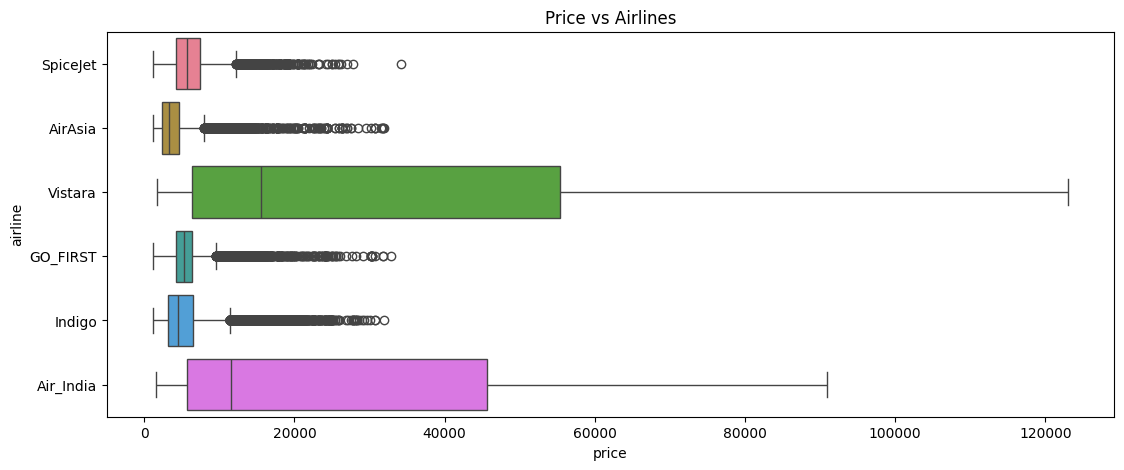

In [35]:
plt.figure(figsize=(13,5))

g4 = sns.boxplot(x='price', y='airline', data=df, palette="husl", hue = "airline", legend=False)
plt.title("Price vs Airlines")
plt.show();

#fig4 = g4.get_figure()
#fig4.savefig("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_1/Graphs/Graph_4")

Insights:



*   As mentioned before, Vistara and Air_India are full-service carrier which offer more premium service to their passenger while GO_First, AirAsia and SpiceJet are LCC. The price distribution above shows full-service carrier have a higher price point compared with LCC.
*  Full-service carrier targeted traveler who prioritise experience over value while LCC is more targeted towards price sensitive traveler.
*   AirAsia offers the cheapest range of ticket price over other LLC if traveler looking for a more budget-friendly option.




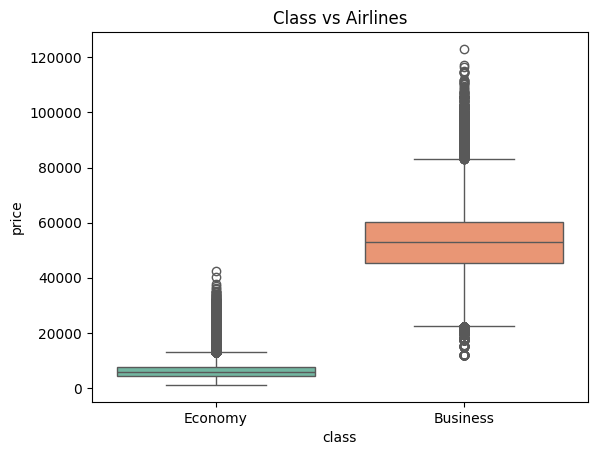

In [36]:
g5 = sns.boxplot(x='class', y='price', data=df, palette="Set2", hue = "class", legend=False)
plt.title("Class vs Airlines")
plt.show();

#fig5 = g5.get_figure()
#fig5.savefig("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_1/Graphs/Graph_5")

Insights:

*   It is common knowledge that business class is more expensive than economy class by 2 to 5 times higher.
*   It lies in the luxurios experience which business class offered such as spacious seat, better food and wider selection of drinks.
*   Access to airport lounges is a common perk for business class travelers.
*   Business class travelers get to have access to airport lounges before boarding the flights which are more comfortable than waiting in the waiting area.







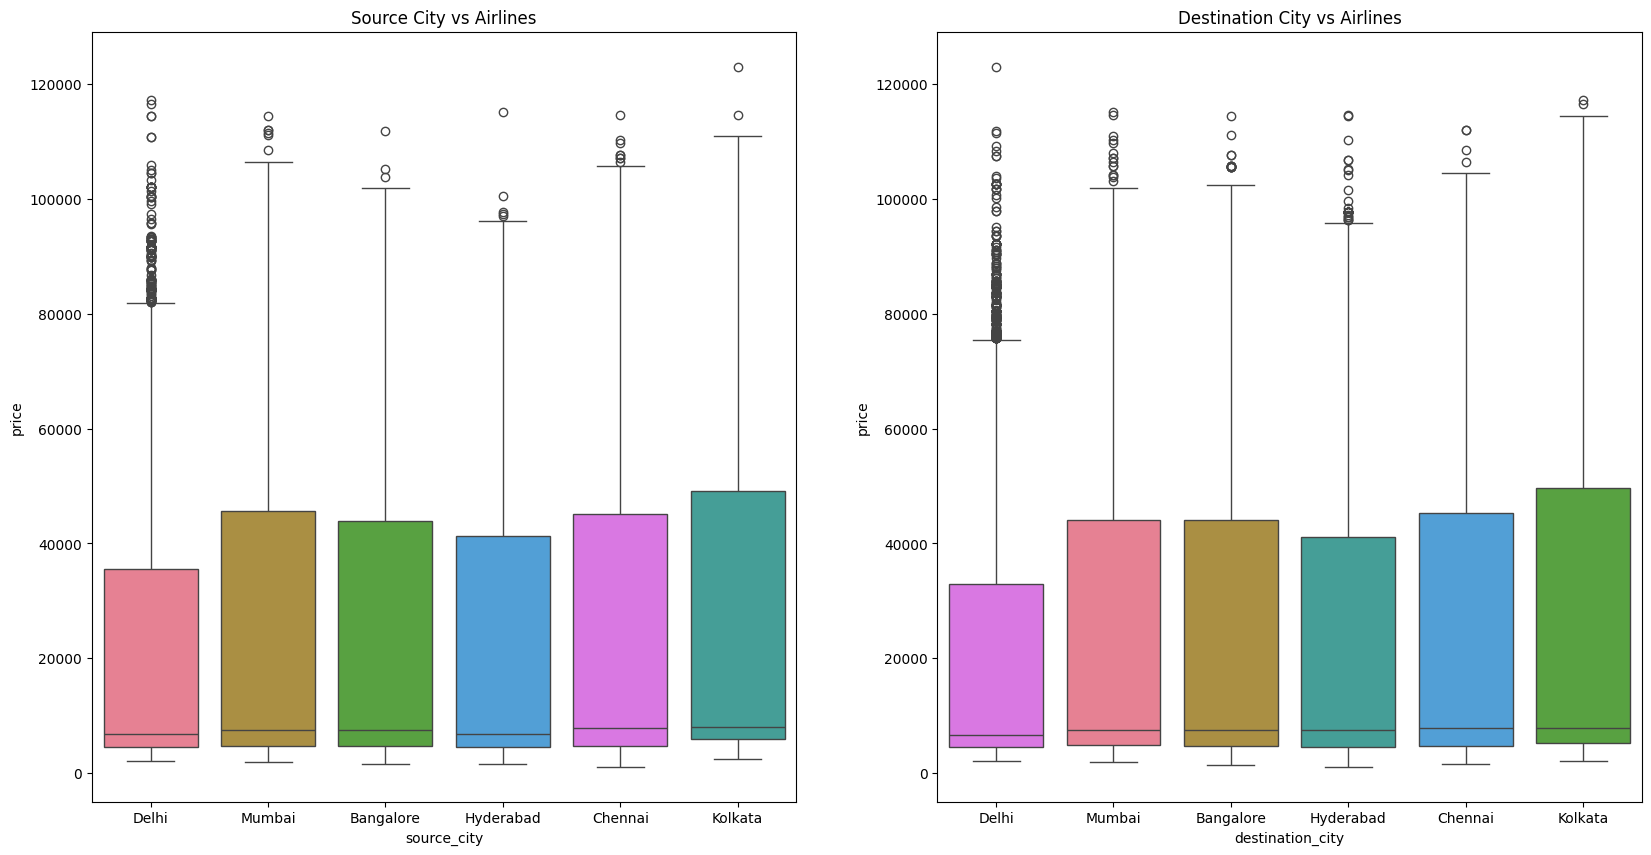

In [37]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
g6_a = sns.boxplot(x='source_city', y='price', data=df, palette="husl", hue = "source_city", legend=False,
            order=['Delhi', 'Mumbai', 'Bangalore', 'Hyderabad', 'Chennai', 'Kolkata'])
plt.title("Source City vs Airlines")

plt.subplot(1,2,2)
g6_b = sns.boxplot(x='destination_city', y='price', data=df, palette="husl", hue = "destination_city", legend=False,
            order=['Delhi', 'Mumbai', 'Bangalore', 'Hyderabad', 'Chennai', 'Kolkata'])
plt.title("Destination City vs Airlines")

plt.show();

#g6_a.get_figure().savefig("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_1/Graphs/Graph_6")

Insights:

Source City:
*   Delhi offers the cheapest range of price among the listed city. However, it has the most outliers indicate there are many business class traveler that willing to buy the ticket despite higher price point than average.
*   Traveler from Kolkata may have to pay higher range of price compared to other cities.

Destination City:


*   The distribution of Delhi city in destination city is the same with source.
It has lower range of price but has the most outliers.
*   Kolkata still the more expensive to travel due to higher range of price compared to other city.
*   Mumbai, Bangalore and Chennai have similar distribution of ticket price of arrival city.


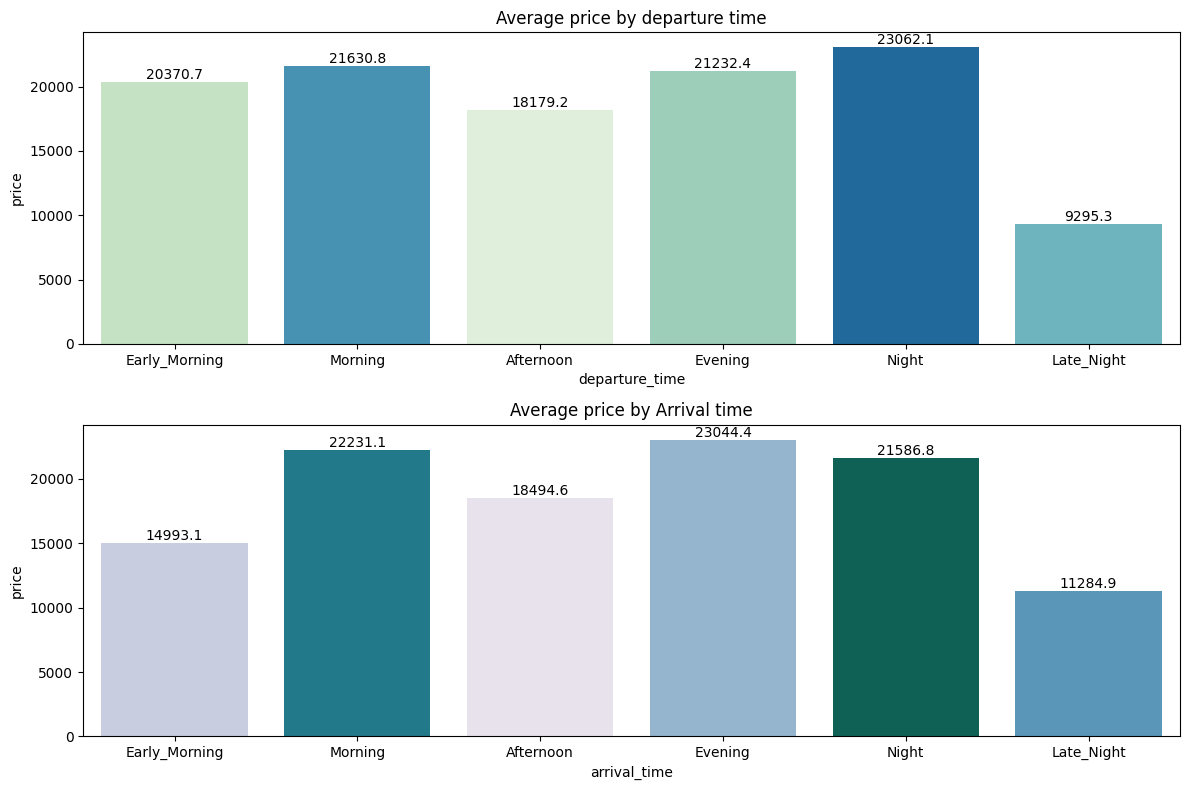

In [38]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Group the data by 'departure_time' and calculate the average ticket price for each group
avg_dt = df.groupby('departure_time')['price'].mean().reset_index()
avg_at = df.groupby('arrival_time')['price'].mean().reset_index()

g7_a = sns.barplot(x='departure_time', y='price', data=avg_dt, palette='GnBu', ax=axes[0],
                 hue = "departure_time", legend=False,
            order = ['Early_Morning', 'Morning','Afternoon','Evening','Night', 'Late_Night'])
for i in g7_a.containers:
    g7_a.bar_label(i,)
axes[0].set_title('Average price by departure time')

g7_b = sns.barplot(x='arrival_time', y='price', data=avg_at, palette='PuBuGn', ax=axes[1],
                 hue = "arrival_time", legend=False,
            order = ['Early_Morning', 'Morning','Afternoon','Evening','Night', 'Late_Night'])
for j in g7_b.containers:
    g7_b.bar_label(j,)
axes[1].set_title('Average price by Arrival time')

plt.tight_layout()
plt.show()

#g7_a.get_figure().savefig("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_1/Graphs/Graph_7")


Insights:

Departure Time:
*   Night has the highest average price followed by morning, evening and early morning. Night flight tickets are more expensive due to demand, limited availability, operational costs, and the preferences of business travelers. Morning flight is considered as peak hours. It is popular among all traveler as it allow travelers to reach destination during the day.
*   For the afternoon and late night, they has substantially lower average price because these timing considered as non-preferred timing which we can see in the pie chart of the most famous departure time.

Arrival Time:


*   Evening has the highest average price followed by morning, night and afternoon. Evening and night are the most popular time for arrival hence airlines use this to leverage their price. Night and evening are generally preferred timing for return flight by traveller.
*   The demand for early morning and late night arrival is low, hence the price are lower compared to other time window.





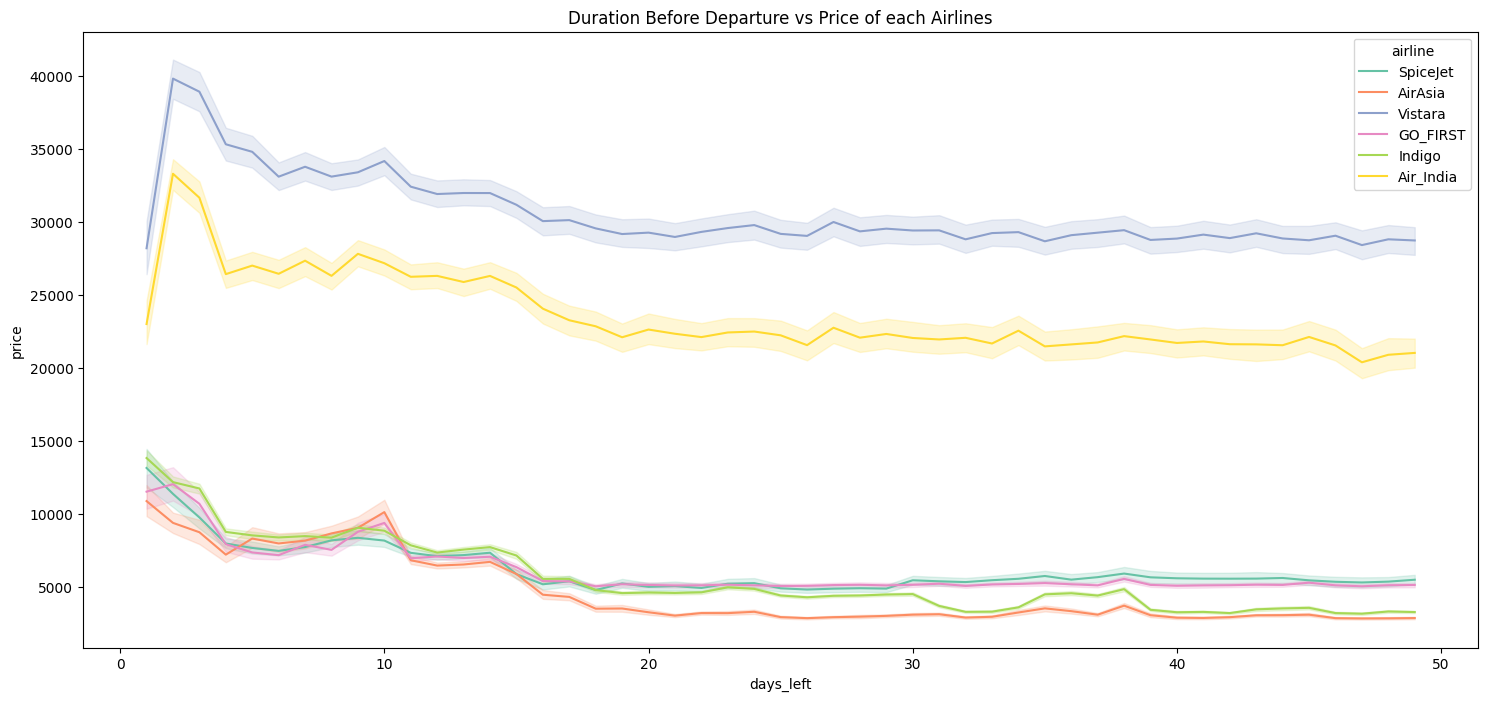

In [39]:
plt.figure(figsize=(18,8))

g8 = sns.lineplot(x='days_left', y='price', data=df, palette="Set2", hue = "airline")
plt.title("Duration Before Departure vs Price of each Airlines")
plt.show();

#fig8 = g8.get_figure()
#fig8.savefig("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_1/Graphs/Graph_8")

Insights:



*   Ticket prices for a flight follow a constant trend between the 18th and 49th day before departure and it is the same across full-service carrier and LCC.
*   The most expensive tickets are found closer to the departure date, with the highest price being charged just two days before the flight for full-service carrier. For LCC, the price start to increase starting 5 days before departure and in its peak a day before departure.
*    This implies that ticket prices rise dramatically as the departure date draws near, making last-minute reservations much more expensive. To avoid paying more for their flights, travelers must be aware of this pricing trend and make plans appropriately.



# **H. Conclusion**

In conclusion, our analysis give a valuable insights of the aviation industry specifically on India domestic market. This analysis reveals pattern on how ticket price is affected based on various factor. There are different price point for full-serviced carrier such as Vistana and Air India with LCC such as IndiGO, GO_FIRST, AirAsia and SpiceJet. Full-service carrier is more expensive than LCC due to its premium offerings. Next, different class offer different point which business class is 2 to 5 times higher than economy class. Besides, price also varies according where is your origin and destination city. Some city offers more affordable price while other is more expansive. Furthermore, traveler should consider the timing of the departure and arrival as different timing gives different ticket price. Non-preferred timing usually is more cheaper and should be consider for traveler on a budget. Lastly, traveler should plan carefully when to travel as the nearer the days before departure, the more expansive ticket price. In general, by taking advantage of the ideal time to book and the most affordable flight options, travelers can save money by making better judgements and organising their journey.